[]
[20]
[20, 50]


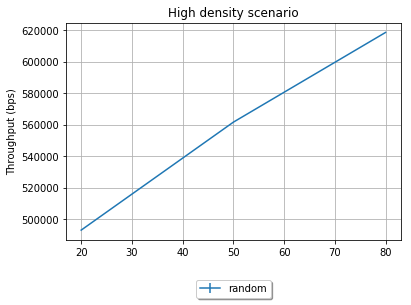

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
from sqlite3 import Error


def getScalarValueFromDB(dbConnexion, query):
    cursor=dbConnexion.cursor()
    cursor.execute(query)
    return cursor.fetchone()[0]

def getDBPath(scenario,OfferedLoadRate,disruptiveTrafficLevel):
    return "examples/unicast/"+scenario+"/"+scenario+"-OfferedLoadRate="+str(OfferedLoadRate)+",disruptiveTrafficLevel="+str(disruptiveTrafficLevel)+",nbrTrs=30,bitrate=6,packetLength=200-#0.sca"

def getDBThroughputQuery(moduleIndex):
    return "SELECT scalarValue FROM scalar WHERE moduleName='SimpleNetwork2.node["+str(moduleIndex)+"].applLayer[0]' AND scalarName='throughput:mean'"


def getMeanThroughput(scenario,OfferedLoadRate,disruptiveTrafficLevel):
    dbPath=getDBPath(scenario,OfferedLoadRate,disruptiveTrafficLevel)
    dbConn = sqlite3.connect(dbPath)
    
    tmpList=[]
    for index in range(20,30):
        query = getDBThroughputQuery(index)
        scalar = getScalarValueFromDB(dbConn, query) 
        if scalar is not None:
            tmpList.append(scalar)
       
    return np.mean(tmpList)


disruptiveTrafficLevels =[]
throughputWeighted=[]
naiveThroughputBasedDecision=[]
yerr=[]

for disruptiveTrafficLevel in range(20,100,30):
    print(disruptiveTrafficLevels)
    disruptiveTrafficLevels.append(disruptiveTrafficLevel)
    throughputWeighted.append(getMeanThroughput("throughputWeighted",90,disruptiveTrafficLevel))
    naiveThroughputBasedDecision.append(getMeanThroughput("naiveThroughputBasedDecision", 90,disruptiveTrafficLevel))
    yerr.append(0)

fig,ax = plt.subplots()

plt.ylabel("Throughput (bps)")
plt.title("High density scenario")

ax.errorbar(disruptiveTrafficLevels,naiveThroughputBasedDecision,yerr=yerr,label="random")
ax.errorbar(disruptiveTrafficLevels,throughputWeighted,yerr=yerr,label="DICART-throughputWeighted")
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.16),
          ncol=3,  shadow=True)

ax.grid()
#fig.savefig("HighDensityScenario",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show() 
    